Prompt: Welche KPIs sind für ein SaaS-Startup in der Wachstumsphase entscheidend?
Intent: Frage
   - Frage: 0.914
   - Zusammenfassung: 0.031
   - Befehl: 0.031
   - Ideengenerierung: 0.023
Domain: Persönlich
   - Persönlich: 0.428
   - Finanzen: 0.214
   - Technik: 0.197
   - Marketing: 0.161
Difficulty: medium
   - medium: 0.525
   - high: 0.287
   - low: 0.188

Prompt: Erkläre mir den Unterschied zwischen Brutto- und Nettomarge.
Intent: Frage
   - Frage: 0.457
   - Befehl: 0.406
   - Zusammenfassung: 0.093
   - Ideengenerierung: 0.044
Domain: Finanzen
   - Finanzen: 0.465
   - Technik: 0.215
   - Marketing: 0.171
   - Persönlich: 0.149
Difficulty: low
   - low: 0.483
   - medium: 0.344
   - high: 0.172

Prompt: Fasse die wichtigsten Ausgaben des letzten Monats in Stichpunkten zusammen.
Intent: Zusammenfassung
   - Zusammenfassung: 0.935
   - Frage: 0.032
   - Befehl: 0.021
   - Ideengenerierung: 0.012
Domain: Finanzen
   - Finanzen: 0.37
   - Persönlich: 0.235
   - Marketing: 0.197


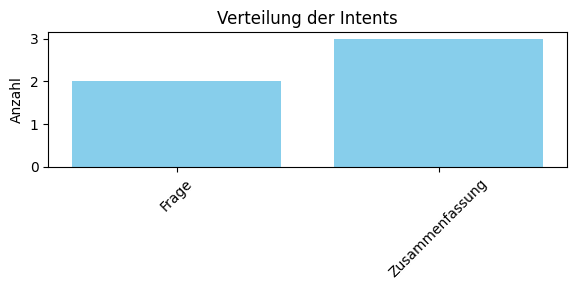

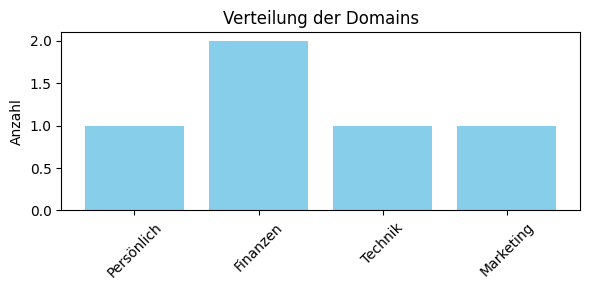

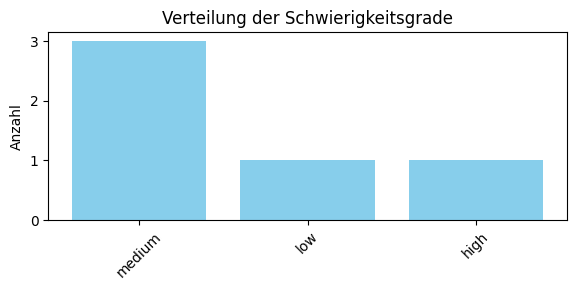

In [8]:
import sys
import os
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append(os.path.abspath(".."))

from src.classifier import classify_prompt

# Korrigierter Pfad zur Datei
with open("../data/example_prompts.txt") as f:
    prompts = [line.strip() for line in f if line.strip()]

# Prompts klassifizieren
for prompt in prompts:
    result = classify_prompt(prompt)
    print("Prompt:", result["prompt"])
    for category, data in result["result"].items():
        print(f"{category.capitalize()}: {data['label']}")
        for label, score in data["scores"].items():
            print(f"   - {label}: {round(score, 3)}")
    print()  # Leerzeile für bessere Lesbarkeit

# Ergebnisse sammeln
intent_counter = Counter()
domain_counter = Counter()
difficulty_counter = Counter()

for prompt in prompts:
    result = classify_prompt(prompt)
    intent_counter[result["result"]["intent"]["label"]] += 1
    domain_counter[result["result"]["domain"]["label"]] += 1
    difficulty_counter[result["result"]["difficulty"]["label"]] += 1

# Plot-Funktion
def plot_counter(counter, title):
    labels, values = zip(*counter.items())
    plt.figure(figsize=(6, 3))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Anzahl")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualisieren
plot_counter(intent_counter, "Verteilung der Intents")
plot_counter(domain_counter, "Verteilung der Domains")
plot_counter(difficulty_counter, "Verteilung der Schwierigkeitsgrade")
